# 선형 회귀 분석
- 머신러닝의 선형 회귀 분석은, 예측의 성공 확률을 높이는데 목적
- 전통적 통계 분석에서의 선형 회귀 분석은, 정해진 분포나 가정을 통혜 실패 확률을 줄이고, 원인을 찾는 데 목적이 있다.

<img src="img/07-23.png" width="800"/>

## 회귀분석 개념
- 하나 혹은 그 이상의 원인이 종속변수에 미치는 영향을 추적하여 식으로 표현
- 머신러닝과 다르게, 식으로 표현하여 해석력을 높임
- 변수들 사이의 상관관계를 밝히고 모형을 적합하여 관심 있는 변수를 예측하거나 추론
- 독립변수의 개수가 하나인 경우, 단순 선형 회귀
- 독립변수가 두개 이상인 경우, 다중 선형 회귀

## 단순 선형 회귀분석의 평가
- 잔차의 합이 최소가 되는 최소제곱법 사용
- 하나의 선이 전체 데이터를 얼마나 잘 설명하는가
- 사용되는 평가 지표 : $R^2$ 과 RMSE 

<img src="img/07-24.png" width="800"/>

- SST는 총변동, SSE는 설명된 변동, SSR은 설명되지 않은 변동
    - $R^2 = 1 - \frac{SSR}{SST}$ 
- 총 변동 중에서 설명된 변동의 비율
- 회귀 추정선이 전체 데이터를 얼마나 잘 설명하고 있는가
- RMSE(Root Mean Squared Error) 는 평균 제곱 오차
    - $RMSE = \sqrt{\sum_{i=1}^{n}\frac{(\hat{y}_i-y_i)^2}{m-2}}$

## 다중 선형 회귀분석 평가
- 독립변수가 2개이상 일때 사용
- 독립변수의 수가 늘어나면 $R^2$ 가 증가
- 독립변수의 수에 패널티를 부과하는 $AdjustedR^2$ 사용

## 회귀분석 검토 사항
### 모형이 데이터를 잘 적합하고 있는가?

<img src="img/07-25.png" width="800"/>

### 모형이 통계적으로 유의 한가
- F통계량의 p-value로 가설 선택
    - 귀무가설 : 회귀 모형은 유의하지 않다.
    - 대립가설 : 외귀 모형은 유의 하다.

### 모형은 데이터를 얼마나 잘 설명하는가
- $R^2$ 확인

### 모형의 회귀 계수는 유의한가
- 회귀계수는 각 계수의 독립변수 검정
- t 값의 p-value 확인

### 파이썬 패키지 설명

<img src="img/07-26.png" width="800"/>

- ols의  return 값은 formula 대로  data가 학습된 모델

<img src="img/07-27.png" width="800"/>

### 파이썬을 활용한 단순 선형 회귀 분석
- kc_house_data의 sqft_living(주거공간의 평방 피트)를 독립변수, price를 종속 변수로 설정하여 단순 선형 회귀 분석 실시한 후, 추정된 회귀 모형에 대해 해석하라

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/kc_house_data.csv')
df = df[['price', 'sqft_living']]

# 독립변수와 종속변수간 선형 가정
# 독립변수와 종속 변수간의 선형관계가 0.7 -> 양의 상관관계 존재 확인
df.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [28]:
#회귀계수와 상관계수와의 차이 확인
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#변수 할당
X = df['sqft_living']
y = df['price']

# 단순 선형 회귀 모델 모형 적합
lr = ols('price ~ sqft_living', data=df).fit()
y_pred = lr.predict(X)

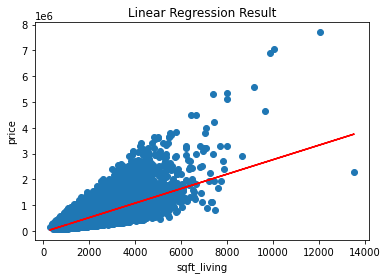

In [29]:
# 시각화
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result')
plt.show()

#### 모형이 데이터를 잘 적합하고 있는가
- 독립변수는 X, 종속 변수는 y에 할당
- 단순 선형 회귀 분석 진행
- return 되는 model의 회귀선을 y_pred에 할당
- 원본 데이터와 회귀선을 시각화하여 데이터의 분포를 보고 회귀선이 적합한지 판단
- 회귀 모형 시각화 결과, 직관적으로 직선이 모든 데이터를 잘 설명하지는 못한다.
- 오차 또한 (0,0)에서 멀어질 수록 분산이 커지는 특성 패턴
- 단순 회귀분석으로는 데이터를 충분히 설명할 수 없는 것으로 보인다.

In [30]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:01:09   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀 모형이 통계적으로 유의한가?
- 귀무가설 : 회귀 모형은 유의하지 않다.
- 대립가설 : 회귀 모형은 유의하다.
- 해당 모델의 F통계량의 p-value로 0 으로 귀무가설 기각, 따라서 유의하다.

#### 모형은 데이터를 얼마나 잘 설명하는가
- $R^2$는 0.493으로 49.3%를 설명
- 모델의 성능은 좋지 않다.

#### 모형 내의 회귀 계수는 유의한가.
- sqft_living의 t 값의 p-value는 0.000으로 유의하다.

## 다중회귀 분석 유의사항
### 다중공선성
- 단순 선형 회귀 분석과 다중 선형 회귀 분석의 차이점은 독립변수의 수
- 독립 변수의 수가 두개 이상일 경우, 필수적으로 다중공선성 문제를 해결 해야
- 다중공선성이란, 독립변수들 간의 강한 상관관계가 나타내는 문제
- 다중공선성의 문제가 존재하면 정확한 회귀계수 추정이 어려움
- 또한 독립변수의 수가 늘 수록 결정계수가 무조건 증가
- 따라서, 변수에 패널티(정규화, Ridge, Lasso) 를 가하여 변수의 영향력을 줄여야 한다
    - 독립변수들 간의 상관계수를 구하여 상관성을 파악 (0.9 이상은 다중공선성 문제가 있다고 판단)
    - 다중공선성 문제가 의심되는 변수들의 회귀분석 허용 오차를 구했을 때, 0.1 이하면 다중공선성이 심각 하다 판단 (허용오차 = $1-R^2$)
    - VIP(Variance Inflacation Factor)의 값이 10 이상이면 다중공선성이 존재할 것으로 예상 (VIP = $\frac{1}{1-R^2}$)

### 변수선택법
- 모형 내 설명변수의 증가는, 데이터 관리에 많은 비용이 발생
- 유의미한 설명변수만 선택하여 최적의 회귀방정식을 도출해야 할 필요
- 변수 선택시의 근거로, F-통계량, AIC, BIC 등 사용    
- 변수 선택법

<img src="img/07-28.png" width="800"/>

## 다중 선형 회귀분석 실습
- 최적의 모델 찾기 위한 변수선택법 진행


In [31]:
from cv2 import dft
import pandas as pd

df = pd.read_csv('./data/Cars93.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [32]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

- 독립 변수 : 'EngineSize', 'RPM', 'Weight', 'Length','MPG.city', 'MPG.highway'
- 종속 변수 : 'Price'

In [33]:
df = df[['EngineSize', 'RPM', 'Weight', 'Length','MPG.city', 'MPG.highway', 'Price']]

In [34]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#ols 모델의 formula를 정의할 때, 일부 특수문자는 쓸 수 없어서 컬럼의 특수문자 제거
df.columns = df.columns.str.replace('.', '')

C:\Users\MINJI\AppData\Local\Temp\ipykernel_14588\1908290795.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')


In [35]:
model = smf.ols(formula='Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           4.88e-14
Time:                        22:01:13   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adj. R-squared:	0.542, 낮은 결과
- 변수를 모두 사용하여도, 54.2%만 Price를 설명 가능
- 변수간의 상관 관계 확인

In [36]:
df.drop('Price', axis=1).corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


- MPGcity와 MPGhighway가 0.9 이상의 높은 상관성 ==> 다중공선성 존재
- 그러나 상관계수로 다중공선성 변수를 제거하기에는 둘 중 어떤 변수를 제거할지가 애매 => VIP 확인

In [37]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway',
                 data=df, return_type='dataframe')

In [38]:
# 독립변수끼리 VIF값 계산하여 데이터프레임으로 만들기

vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])


,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


- MPGcity 를 제거 후에 다시 다중 회귀 분석을 진행 한다.

In [39]:
model = smf.ols(formula='Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.28e-14
Time:                        22:01:17   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adj. R-squared은 별 차이가 없다.
- MPGhighway의 p-value가 0.900에서 0.282로 현저히 낮아짐
- 다음과 같이 변수선택법을 함수화 하여 진행 한다

In [40]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [41]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model


In [42]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])


In [43]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000244D7B3E070>
forward
Processed  1 models on 0 predictors in 0.0009968280792236328
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000244D7B3E520>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000244D7B3BEB0>
forward
Processed  2 models on 1 predictors in 0.003986835479736328
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000244D4222610>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000244D7B3E730>
forward
Process

In [44]:
#최종 모델 해석
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           6.75e-16
Time:                        22:01:19   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 모델 설명
    - ['Weight', 'RPM', 'EngineSize'] 가 선택 됨
    - Adj. R-squared:	0.547
    - 회귀식 : $y = 0.0073*Weight + 0.0071*RPM + 4.3054*EngineSize -51.7933$
    - 회귀식에서 가장 크게 영향을 끼치는 변수는 EngineSize


# 군집분석
- 군집분석 : 각 객체의 유사성을 측정하여, 유사성이 높은 대상집단을 분류하는 통계적 기법
- 요인분석 : 데이터의 유사한 변수를 묶어 다중공선성을 줄이는 목적
- 종속변수가 없어 비지도학습으로 분류

## 계층적 군집분석
### 개념 설명
- 계층적 군집분석은 n개의 군집으로 시작해 점차 군집의 개수를 줄여가는 방법
- 군집의 거리를 계산하는 방법에 따라 사용하는 연결법이 달라짐

### 종류

<img src="img/07-29-01.png" width="800"/>
<br>
<img src="img/07-29-02.png" width="800"/>

### 계측적 군집분석 파이썬 함수 설명

#### linkage

<img src="img/07-30.png" width="800"/>

<img src="img/07-31.png" width="800"/>

#### dendrogram

<img src="img/07-32.png" width="800"/>

<img src="img/07-33.png" width="800"/>

#### fcluster

<img src="img/07-34.png" width="800"/>

<img src="img/07-35.png" width="800"/>

### 계층적 군집분석 실습
- USArrests 데이터, 최단, 최장, 와드 연결법 사용
- 1973년 미국 50개 주에서 폭행, 살인 및 강간으로 체포된 인구 100,000명 당 통계
- 4개의 변수에 대한 50개의 관측값
    - Muder : 살인 체포
    - Assault : 폭행 체포
    - UrbanPop : 도시 인구 비율
    - Rape : 강간 체포

In [45]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('./data/USArrests.csv')
df.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
lablelist = df.State.tolist()
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [47]:
# 최단 연결법
single = linkage(df.iloc[:, 1:], metric='euclidean', method='single')

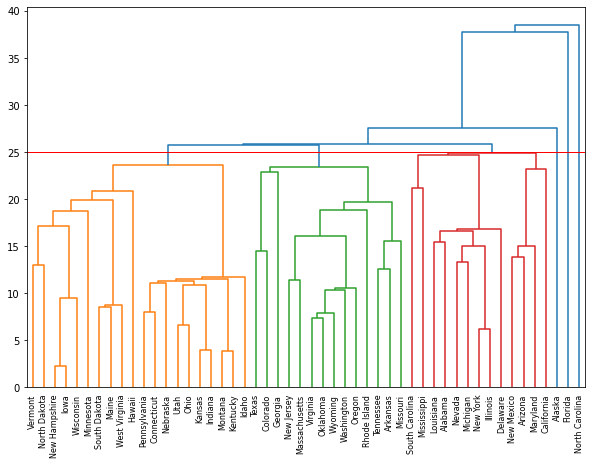

In [48]:
# 덴드로 그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single, orientation='top', labels=lablelist,
          distance_sort='descending', color_threshold=25, #군집 수를 설정하는 height값
          show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1) #height값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

- t값의 기준을 25로 군집화를 시켰을 때, 6개의 군집이 생긴다고 예상
- 최단 연결법은 군집이 가지고 있는 객체의 수가 비슷하지 않아 군집 해석에 어려움이 있음

In [49]:
# 와드 연결법
ward = linkage(df.iloc[:, 1:], metric='euclidean', method='ward')

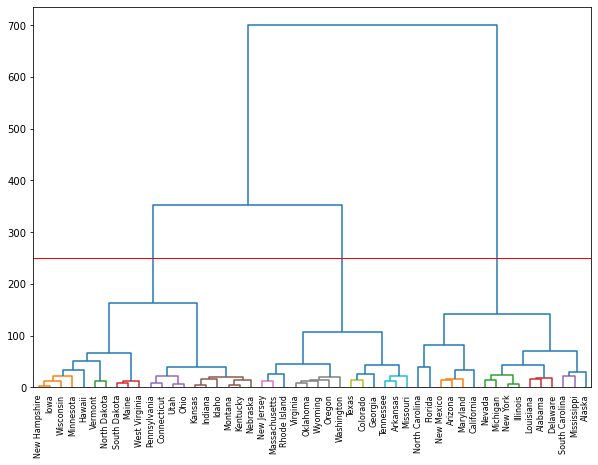

In [50]:
# 덴드로 그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward, orientation='top', labels=lablelist,
          distance_sort='descending', color_threshold=25,
          show_leaf_counts=True)

plt.axhline(y=250, color='r', linewidth=1)
plt.show()

- t 값을 250으로 설정하면, 3개의 군집으로 나누어짐
- 각 군집의 수가 비슷하여 적절하게 보임, 해석이 용이함
- 와드 연결법으로 적절한 t (250)을 찾았으면, fcluster 함수로 이를 적용하여 
- 각 객체들이 가진 군집 번호를 데이터화

In [51]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [52]:
df['cluster'] = assignments
df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


## 비계층적 군집분석
- 랜덤하게 군집을 묶어 나가는 알고리즘
- K-means, DBSCAN, 혼합분포 등이 있음

### K-means

<img src="img/07-36.png" width="400"/>

#### 개념
- 속성의 개수가 적은 단순한 데이터에 활용
- 주어진 데이터를 K 개의 클러스터로 군집화
- 각 클러스터와의 거리 차이의 분산을 최소화 하는 방식

#### 표준 알고리즘

<img src="img/07-37.png" width="400"/>

##### 초깃값 설정
- k는 하이퍼파라미터
- 임의의 k개의 데이터를 각 클러스터의 중심으로 설정

<img src="img/07-38.png" width="400"/>

##### 클러스터 설정
- 각 데이터로 부터 각 클러스터들의 중심까지의 거리 계산
- 해당 데이터에서 가장 가까운 클러스터를 찾아 데이터 배당

<img src="img/07-39.png" width="400"/>

##### 클러스터의 중심 재조정
- $\mu_i$를 각 클러스터에 있는 데이터들의 무게 중심으로 재설정

<img src="img/07-40.png" width="400"/>

- 위 단계를 반복하여, 변화가 없을 때 까지 진행

#### 특정
- 알고리즘이 쉽고 간결
- 변수가 많을 경우 군집화 정확도 낮아짐 (차원축소 진행)
- 군집의 수 K를 사용자가 알아서 설정해야

#### 최적의 군집 개수 판단법
##### 콜린스키 하라바츠 스코어 방법
- 모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산의 합의 비율
- 점수가 높을 수록 높은 성능
##### 엘보우 방법
- 클러스터 내 오차제곱합을 클러스터 개수마다 비교
- 반복문을 통해 클러스터의 개수(k)를 늘려가며 계산한 오차제곱합 비교
- 어느 숭간 오차제곱합이 급격히 줄어드는 부분, 기울기가 소실되는 구간을 elbow 로 판단
- 이곳을 최적의 클러스터 개수로 판단

#### 파이썬을 이용한 K-means 알고리즘 구현
- iris 데이터의 target을 사용하지 않고 군집화

In [53]:
import pandas as pd
from sklearn.cluster import KMeans

iris = pd.read_csv('./data/iris.csv')
X = iris.drop('target', axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 하라바츠 스코어와 엘보우기법으로 적절한 K를 찾는다

In [54]:
#클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(k, calinski_harabasz_score(X, labels))

C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 513.3038433517568
3 560.3999242466402


C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 529.1207190840455
5 494.0943819140986


C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 474.51742958716295
7 448.8714494416451


C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 436.61302488142496
9 414.5303174051382


- k 값이 3일 때 가장 높은 값을 가진다.
- 따라서 K = 3으로 설정
- 다음은 엘보우 기법에 대한 구현

C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

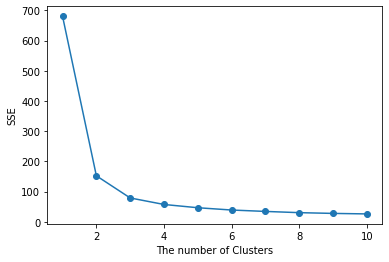

k : 1, sse : 680.8244000000001
k : 2, sse : 152.36870647733906
k : 3, sse : 78.94084142614601
k : 4, sse : 57.345409315718165
k : 5, sse : 46.53558205128205
k : 6, sse : 38.957011157119865
k : 7, sse : 34.32652991452992
k : 8, sse : 30.227724598930486
k : 9, sse : 27.766706937799043
k : 10, sse : 26.072251823340054


In [55]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    K = []
    for k in range(1, 11):
        km = KMeans(n_clusters=k, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        K.append(k)
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    return K, sse
    
K, SSE = elbow(X)
for k, sse in zip(K, SSE):
    print(f'k : {k}, sse : {sse}')

- k 가 sse가 평평해지는 4 이전 2 혹은 3이 적당해 보임

In [56]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [57]:
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels
iris.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


- 시각화

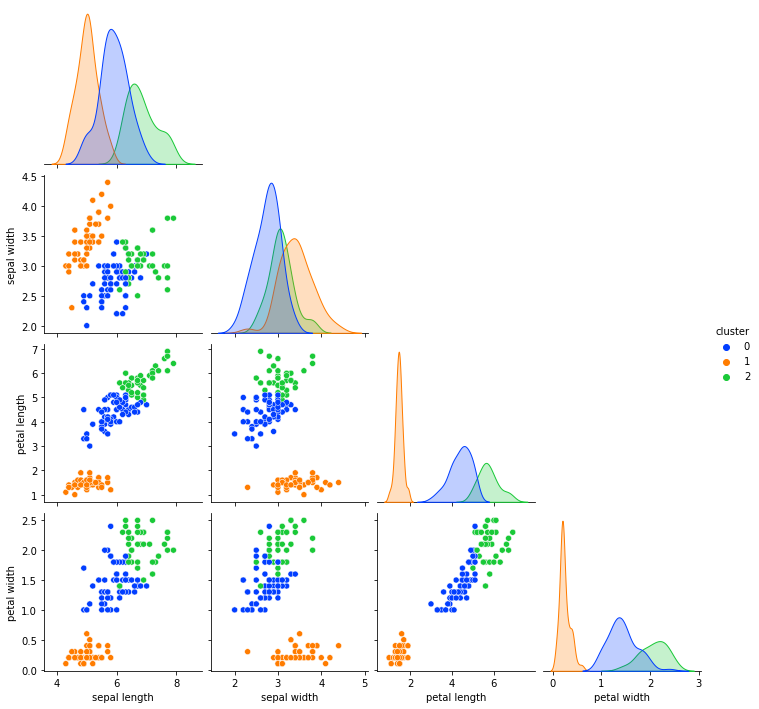

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris, diag_kind='kde', hue='cluster', 
             corner=True, palette='bright')
plt.show()

- 3개의 군집으로 잘 나뉘어 있음

# 원본 데이터의 target 으로 시각화

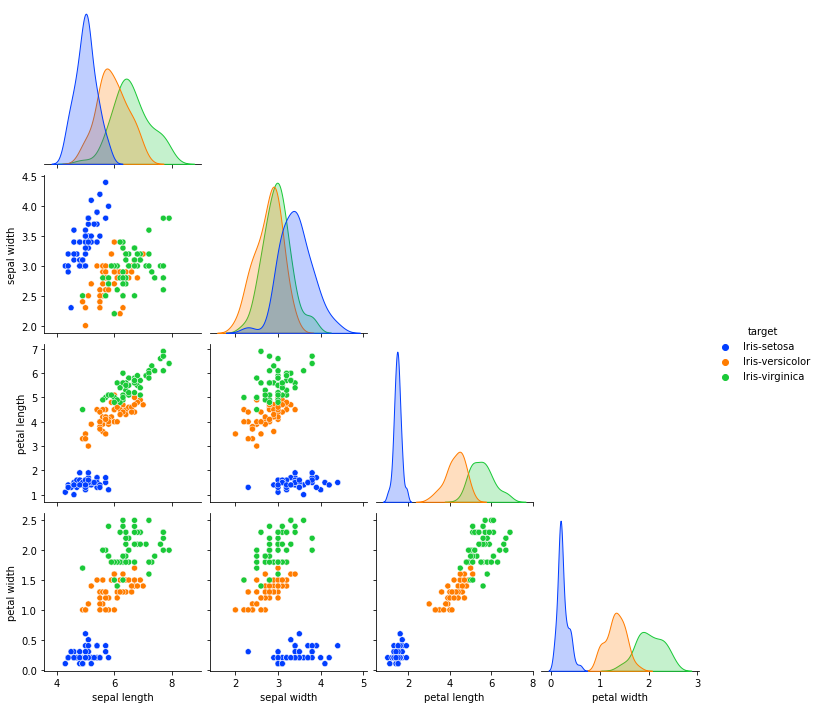

In [59]:
sns.pairplot(iris.drop(columns=['cluster']), diag_kind='kde', hue='target', 
             corner=True, palette='bright')
plt.show()

### 혼합분포 군집 분석
- k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로 나왔다는 가정
- k개의 각 모형은 군집이며, 각 데이터는 추정된 k개의 모형 중 어느 모형에서 나왔을 확률이 높은지에 따라 군집 분류

#### 사용 이유
- 실행활 데이터를 적용시키기위해 발전된 모델
- K-means는 원형으로 군집화된 데이터에 적합, 밀도기반인 DBSCAN은 반달형태의 데이터에 잘 적합됨
- 실행활 데이터는 원형, 반달형태등과 다름

#### 장점

<img src="img/07-41.png" width="800"/>

#### 사용 알고리즘 : EM(Expectation-Maximization)
- 각 자료에 대해 Z의 조건부분포로부터 조건부 기댓값을 구할 수 있다.
- Z의 조건부 분포 : 어느 집단에 속할지에 대한 확률 분포
    - 관측변수 X와 잠재변수 Z를 포함하는 (X, Z)에 대한 로그-가능도 함수에 대해 Z대신 상수값인 Z의 조건부 기대값을 대입
    - 로그-가능도 함수를 최대로 하는 모수를 쉽게 찾을 수 있다.
    - 이 추정과정을, '최대가능도추정' 이라고 한다
- EM 알고리즘의 4단계
    - 초깃값 설정 : 필요한 모수에 대해 초깃값 선정
    - E : 잠재변수 Z의 기대치 계산 (X가 특정 집단에 속할 확률)
    - M : 잠재변수 Z의 기대치를 이용해 파라미터 추정(계산된 확률을 통해 모수를 재추정)
    - 반복 정지 : 수렴조건이 만족될 때까지 E와 M 반복
    - 수렴조건 : 최대가능도(Likelihood)가 최대인가?
    
#### 파이썬을 활용한 혼합분포 군집 분석
```python
class sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
```
##### 주요 매개 변수

<img src="img/07-42.png" width="800"/>

- iris 데이터로 혼합분포 군집분석
- 정규분포 기반으로, StandardScaler 적요 필요

In [60]:
#필요한 모듈
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

#데이터 업로드
iris = pd.read_csv('./data/iris.csv')
df = iris.drop('target', axis=1)

#데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 가우시한 혼합 모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels #예상되는 군집 할당

C:\Users\MINJI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
#예상 군집을 cluster 변수에 할당하고 통계량 확인하기
df['gmm_cluster'] = gmm_labels
#군집의 변수별 통계량 확인
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.554545,2.950909,5.489091,1.989091
2,5.904444,2.775556,4.193333,1.293333


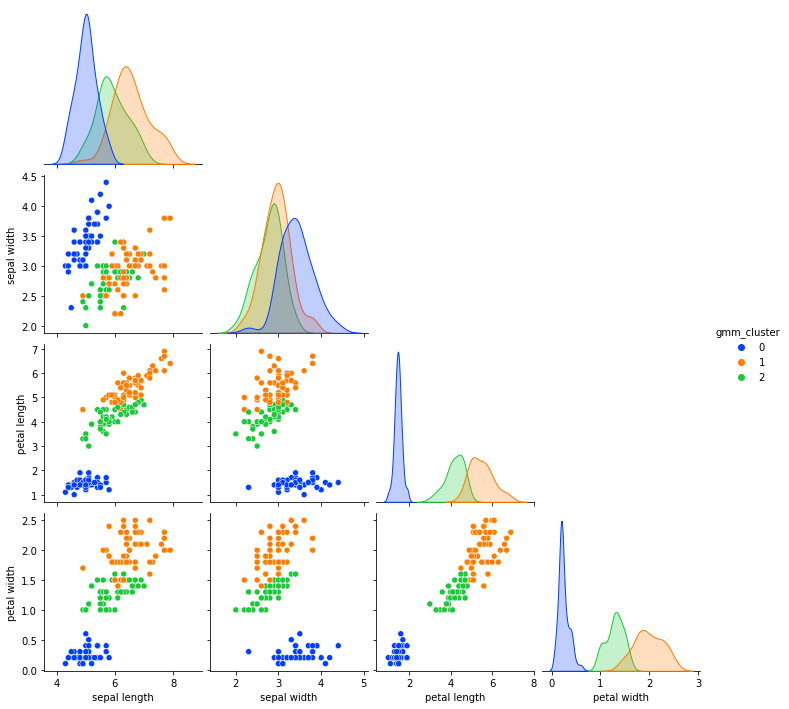

In [62]:
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, diag_kind='kde', hue='gmm_cluster', corner=True, palette='bright')
plt.show()